# Import libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Import Data

In [5]:
data = 'Ratios_Example.csv'
#df = pd.read_csv(data)
df = pd.read_csv(data, delimiter=";", decimal=",")

In [6]:
df.head()

,City_ID,Class_1,Class_2,Class_3,Class_4,Class_5
0,London,0.2,0.2,0.2,0.2,0.2
1,Paris,0.316,0.387,0.1,0.096,0.101
2,Lisbon,0.407,0.267,0.296,0.016,0.014
3,Malaga,0.034,0.178,0.756,0.008,0.024
4,Oslo,0.081,0.806,0.038,0.047,0.028


In [7]:
X = df.copy()
y = df['City_ID']
X.drop(['City_ID'], axis=1, inplace=True)

# K-Means call with Elbow method

To define the optimal K

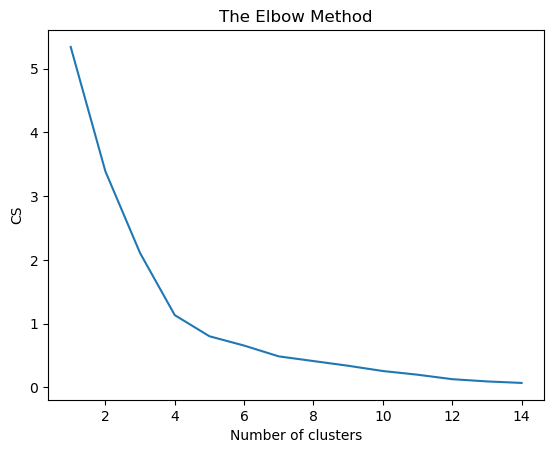

In [9]:
cs = []
max = 15
for i in range(1, max):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, max), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

# Use k= 4 

In [10]:
k = 4
kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=0)

# Statistics

Insertia (example: https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet)

In [12]:
print("Inertia: ", kmeans.inertia_)
print("Number of clusters: ", kmeans.n_clusters)
print("Label per Data Point: ", kmeans.labels_)

Inertia:  1.1339788952380951
Number of clusters:  4
Label per Data Point:  [3 1 3 3 1 3 1 3 1 1 3 2 0 0 2 0 3 0 0 2]


# Print every cluster

In [14]:
labels = np.array(kmeans.labels_)
clusters = []
cities = np.array(y)
for i in range(k):
    a = cities[np.where(labels == i)]
    clusters.append(a)
    print("Elements in cluster ", i, " are: ", a)

Elements in cluster  0  are:  ['Berlin' 'Budapest' 'Monaco' 'Zagreb' 'Amsterdam']
Elements in cluster  1  are:  ['Paris' 'Oslo' 'Madrid' 'London' 'Helsenki']
Elements in cluster  2  are:  ['Athens' 'Rome' 'Vienna']
Elements in cluster  3  are:  ['London' 'Lisbon' 'Malaga' 'Montpellier' 'Luxembourg' 'Kiev' 'Copenhagen']


In [15]:
clusters

[array(['Berlin', 'Budapest', 'Monaco', 'Zagreb', 'Amsterdam'],
       dtype=object),
 array(['Paris', 'Oslo', 'Madrid', 'London', 'Helsenki'], dtype=object),
 array(['Athens', 'Rome', 'Vienna'], dtype=object),
 array(['London', 'Lisbon', 'Malaga', 'Montpellier', 'Luxembourg', 'Kiev',
        'Copenhagen'], dtype=object)]